In [36]:
# Author dataset: https://www.kaggle.com/datasets/ashydv/car-price-prediction

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import os

In [37]:
# Read dataset
df = pd.read_csv('./archive/CarPrice_Assignment.csv')
# df.drop(columns=['Unnamed: 0'], inplace=True)
# df.drop(columns=['Job Description'], inplace=True)
df.drop(columns=['car_ID'], inplace=True)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [38]:
df.shape

(205, 25)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [40]:
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [41]:
for i in df.select_dtypes(include=['object']).columns:
    print(df[i].value_counts())
    print("***"*25)

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
***************************************************************************
gas       185
diesel     20
Name: fueltype, dtype: int64
***************************************************************************
std      168
turbo     37
Name: aspiration, dtype: int64
***************************************************************************
four    115
two      90
Name: doornumber, dtype: int64
***************************************************************************
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
***************************************************************************
fwd   


Missing/Unknown Values:
 symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


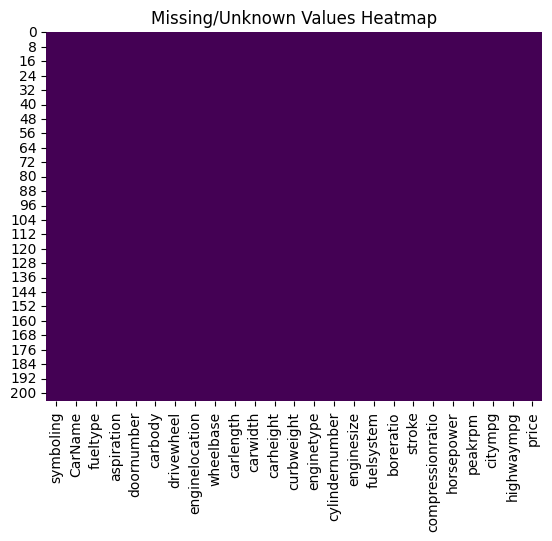

In [42]:
print("\nMissing/Unknown Values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing/Unknown Values Heatmap")
plt.show()

In [43]:
df.duplicated().sum()

0

In [44]:
print(df.shape)

(205, 25)


In [45]:
# x=df.drop(columns=[
#         'Job Title', 'Salary Estimate',
#         'Company Name', 'Location', 'Headquarters', 'Competitors',
#         'company_txt', 'min_salary', 'max_salary', 'avg_salary'
#     ]
# )
x=df.drop(columns=['price'])
x.head()
# y=df['avg_salary']
y=df['price']


import statsmodels.api as sm

def forward_selection_bic(X, y):
    print("--- Forward selection by BIC ---")
    
    remaining_features = list(X.columns)
    remaining_features.remove('const') 
    
    selected_features = ['const']
    
    current_best_bic = sm.OLS(y, X[selected_features]).fit().bic
    print(f"Base model (with intercept): BIC = {current_best_bic:.2f}")

    while remaining_features:
        best_feature_to_add = None
        best_new_bic = current_best_bic 

        for feature in remaining_features:
            model_features = selected_features + [feature]
            try:
                model = sm.OLS(y, X[model_features]).fit()
                new_bic = model.bic
            except Exception as e:
                continue
            
            if new_bic < best_new_bic:
                best_new_bic = new_bic
                best_feature_to_add = feature
        
        if best_feature_to_add:
            selected_features.append(best_feature_to_add)
            remaining_features.remove(best_feature_to_add)
            current_best_bic = best_new_bic
            print(f"  + Add '{best_feature_to_add}', the new BIC = {current_best_bic:.2f}")
        else:
            print("\nStop with no better attribute.")
            break
            
    print("\n--- Done! ---")
    return selected_features



In [46]:
print(x.shape)

(205, 24)


In [47]:
# x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.2, random_state=42
# )
# 60% train, 20% validation, 20% test

x_trainval, x_test, y_trainval, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval, y_trainval, test_size=0.25, random_state=42
)
# copies avoid SettingWithCopy warnings
x_train = x_train.copy()
x_val = x_val.copy()
x_test = x_test.copy()

num_cols = x_train.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train[num_cols])

x_train.loc[:, num_cols] = imputer.transform(x_train[num_cols])
x_val.loc[:, num_cols] = imputer.transform(x_val[num_cols])
x_test.loc[:, num_cols] = imputer.transform(x_test[num_cols])

cat_cols = x_train.select_dtypes(include='object').columns
x_train = pd.get_dummies(x_train, columns=cat_cols, drop_first=True)
x_val = pd.get_dummies(x_val, columns=cat_cols, drop_first=True)
x_test = pd.get_dummies(x_test, columns=cat_cols, drop_first=True)


# align validation/test columns with the training design matrix
x_val = x_val.reindex(columns=x_train.columns, fill_value=0)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

num_cols = [c for c in x_train.columns if x_train[c].nunique() > 2 and pd.api.types.is_numeric_dtype(x_train[c])]

scaler = StandardScaler()
scaler.fit(x_train[num_cols])
x_train[num_cols] = scaler.transform(x_train[num_cols])
x_val[num_cols] = scaler.transform(x_val[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

X_train_const = sm.add_constant(x_train, has_constant='add')
selected_features = forward_selection_bic(X_train_const, y_train)

print("\nCác cột được chọn:")
print(selected_features)

selected_cols = [f for f in selected_features if f != 'const']

x_train_sel = x_train[selected_cols]
x_val_sel   = x_val[selected_cols]
x_test_sel  = x_test[selected_cols]


os.makedirs('archive/train', exist_ok=True)
os.makedirs('archive/val', exist_ok=True)
os.makedirs('archive/test', exist_ok=True)

x_train_sel.to_csv('archive/train/x_train_BIC.csv', index=False)
x_val_sel.to_csv('archive/val/x_val_BIC.csv', index=False)     # ensure
x_test_sel.to_csv('archive/test/x_test_BIC.csv', index=False)

x_train.to_csv('archive/train/x_train.csv', index=False)
x_val.to_csv('archive/val/x_val.csv', index=False)     # ensure
x_test.to_csv('archive/test/x_test.csv', index=False)

y_train.to_csv('archive/train/y_train.csv', index=False)
y_val.to_csv('archive/val/y_val.csv', index=False)   # ensure archive/val exists
y_test.to_csv('archive/test/y_test.csv', index=False)

--- Forward selection by BIC ---


C:\Users\DMX\AppData\Local\Temp\ipykernel_6964\1628134740.py:21: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_train.loc[:, num_cols] = imputer.transform(x_train[num_cols])
C:\Users\DMX\AppData\Local\Temp\ipykernel_6964\1628134740.py:22: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_val.loc[:, num_cols] = imputer.transform(x_val[num_cols])
C:\Users\DMX\AppData\Local\Temp\ipykernel_6964\1628134740.py:23: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a n

Base model (with intercept): BIC = 2545.45
  + Add 'enginesize', the new BIC = 2398.74
  + Add 'enginelocation_rear', the new BIC = 2380.02
  + Add 'carwidth', the new BIC = 2337.98
  + Add 'drivewheel_fwd', the new BIC = 2321.38
  + Add 'enginetype_l', the new BIC = 2302.68
  + Add 'CarName_bmw x3', the new BIC = 2290.56
  + Add 'carbody_hatchback', the new BIC = 2287.07
  + Add 'doornumber_two', the new BIC = 2284.07
  + Add 'CarName_saab 99e', the new BIC = 2280.94
  + Add 'CarName_bmw 320i', the new BIC = 2278.81
  + Add 'enginetype_rotor', the new BIC = 2276.53
  + Add 'CarName_buick skylark', the new BIC = 2274.51
  + Add 'CarName_bmw x1', the new BIC = 2271.90
  + Add 'cylindernumber_six', the new BIC = 2268.91
  + Add 'boreratio', the new BIC = 2258.09
  + Add 'curbweight', the new BIC = 2254.56
  + Add 'carlength', the new BIC = 2247.27
  + Add 'CarName_toyota carina', the new BIC = 2234.09
  + Add 'stroke', the new BIC = 2228.88
  + Add 'carbody_wagon', the new BIC = 2223.49


In [48]:
# X_with_const = sm.add_constant(x_train, has_constant='add')

# y=y_train
# y.head()

# final_selected_features = forward_selection_bic(X_with_const, y)

# print(f"\n========================================================")
# print(f"Best attributes:")
# print(f"========================================================")
    
# for f in final_selected_features:
#     print(f)

# features_to_keep = [f for f in final_selected_features if f != 'const']

# x = x[features_to_keep]

In [49]:
# imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

# imputer.fit(x.select_dtypes(include='number'))
# x.loc[:, x.select_dtypes(include='number').columns] = imputer.transform(x[x.select_dtypes(include='number').columns])
# x

In [50]:
# categorical_features = x.select_dtypes(include=['object']).columns
# dummy=pd.get_dummies(x, columns=categorical_features, drop_first=True)
# dummy

In [51]:
# x_train,x_test,y_train,y_test=train_test_split(dummy,y,test_size=0.2,random_state=42)
# x_train.to_csv("archive/train/x_train.csv", index=False)
# x_test.to_csv("archive/test/x_test.csv", index=False)
# y_train.to_csv("archive/train/y_train.csv", index=False)
# y_test.to_csv("archive/test/y_test.csv", index=False)